In [64]:
import numpy as np
import pandas as pd

salary_data = pd.read_csv('/content/all_salary_data.csv', encoding='latin1')
stats_data = pd.read_csv('/content/2010-2024_average(3).csv', encoding='latin1')
# 각 선수의 데이터를 추가할 열을 미리 정의
new_columns = ['Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
               'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# 새로운 열을 미리 추가하고, 초기값은 None으로 설정
for col in new_columns:
    salary_data[col] = None

# 모든 행에 대해 데이터 처리
for idx, row in salary_data.iterrows():
    player_name = row['name']
    start_year = row['start']

    # start_year 이전 3년치 데이터 필터링
    filtered_stats = stats_data[(stats_data['name'] == player_name) &
                                (stats_data['year'].between(start_year-1, start_year))]

    if not filtered_stats.empty:
        # Pos 열 값 추가 (가장 위의 행에서 가져옴)
        salary_data.at[idx, 'Pos'] = filtered_stats.iloc[0]['Pos']
        filtered_stats.drop(columns=['Pos'], inplace=True, errors='ignore')

        # 나머지 열 값들 평균 계산 후 추가
        for col in new_columns[1:]:
            if col in filtered_stats.columns:
                salary_data.at[idx, col] = filtered_stats[col].astype(float).mean()
            else:
                salary_data.at[idx, col] = None
salary_data=salary_data.dropna()
# 업데이트된 데이터 저장
salary_data.to_csv('/content/final_nba_data(2).csv', index=False)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-64-ddf08275245a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stats.drop(columns=['Pos'], inplace=True, errors='ignore')
<ipython-input-64-ddf08275245a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stats.drop(columns=['Pos'], inplace=True, errors='ignore')
<ipython-input-64-ddf08275245a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stats.drop(c

In [3]:
cd ..

/


In [42]:
#1년치 데이터합치는 코드
import pandas as pd

# 데이터 로드
stat_data = pd.read_csv('/content/2010_2024stat(3).csv', encoding='ISO-8859-1')
stat_data.head()
salary_data=pd.read_csv('/content/all_salary_data.csv', encoding='ISO-8859-1')
salary_data.head()
#salary_data['start']=salary_data['start'].astype(int)
merged_data = pd.merge(stat_data, salary_data, on=['name', 'start'])
merged_data = merged_data.drop_duplicates()
# Display the number of missing values in each column
print(merged_data.isnull().sum())

# Drop rows with any missing values
merged_data = merged_data.dropna()

# Display the first few rows after removing duplicates and handling missing values
print(merged_data.head())
merged_data.to_csv('combined_data.csv', index=False)
# Display the first few rows of the merged dataset
print(merged_data.head())


name      0
start     0
Tm        0
Pos       0
Age       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
debut     0
end       0
salary    0
birth     0
target    0
dtype: int64
           name  start             Tm Pos   Age    G         GS         MP  \
0   A.J. Lawson   2023  TOT, MIN, DAL  SG  22.0   30   0.000000   7.213333   
1  Aaron Brooks   2013  TOT, SAC, HOU  PG  28.0  106  18.679245  18.783019   
2  Aaron Brooks   2014  TOT, HOU, DEN  PG  29.0  144   8.416667  21.627083   
3  Aaron Brooks   2015            CHI  PG  30.0   82  21.000000  23.000000   
4  Aaron Brooks   2016            CHI  PG  31.0   69   0.000000  16.100000   

         FG        FGA  ...       STL       BLK       TOV        PF  \
0  1.483333   2.930000  ...

In [65]:

#일단 1년치로 예측하는코드 포지션별로 다르게

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# Load the combined dataset
data = pd.read_csv('/content/final_nba_data(2).csv')

# 포지션으로 필터링
guards = data[data['Pos'].isin(['PG', 'SG'])]
print(guards.shape)
forwards = data[data['Pos'].isin(['SF', 'PF'])]
print(forwards.shape)
centers = data[data['Pos'] == 'C']
print(centers.shape)

#각 포지션별 피쳐 선택
guard_features = ['AST', 'PTS', '3P%', 'FT%', 'STL', 'TOV', 'MP', 'G']

forward_features = ['PTS', 'TRB', 'AST', '3P%', 'FG%', 'STL', 'BLK', 'MP']


center_features = ['TRB', 'BLK', 'PTS', 'FG%', 'AST', 'MP', 'G', 'FT%']


def train_and_evaluate_model(data, features):
    X = data[features]
    y = data['target']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)



    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    return model, X_test, y_test

# Train and evaluate models for each position
print("Guard Model")
guard_model, guard_X_test, guard_y_test = train_and_evaluate_model(guards, guard_features)

print("\nForward Model")
forward_model, forward_X_test, forward_y_test = train_and_evaluate_model(forwards, forward_features)

print("\nCenter Model")
center_model, center_X_test, center_y_test = train_and_evaluate_model(centers, center_features)

import matplotlib.pyplot as plt
import seaborn as sns

def visualize_results(model, X_test, y_test, title):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('Actual Salaries')
    plt.ylabel('Predicted Salaries')
    plt.title(f'Actual vs Predicted Salaries for {title}')
    plt.show()





(1121, 33)
(920, 33)
(440, 33)
Guard Model
Mean Squared Error: 0.00237795511478513
R^2 Score: 0.5992458347216676

Forward Model
Mean Squared Error: 0.0027648486332680073
R^2 Score: 0.449800486576202

Center Model
Mean Squared Error: 0.0039006009084851506
R^2 Score: 0.357716834703075


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/final_nba_data.csv',encoding='ISO-8859-1')
data= data.dropna()
data.to_csv('/content/final_nba_data(2).csv', index=False)

           name  start             Tm Pos   Age    G         GS         MP  \
0  Aaron Brooks   2013  TOT, SAC, HOU  PG  28.0  106  18.679245  18.783019   
1  Aaron Brooks   2014  TOT, HOU, DEN  PG  29.0  144   8.416667  21.627083   
2  Aaron Brooks   2015            CHI  PG  30.0   82  21.000000  23.000000   
3  Aaron Brooks   2016            CHI  PG  31.0   69   0.000000  16.100000   
4  Aaron Brooks   2017            IND  PG  32.0   65   0.000000  13.800000   

         FG        FGA  ...       STL       BLK       TOV        PF  \
0  2.691509   5.989623  ...  0.566981  0.213208  1.297170  1.770755   
1  3.202778   8.086806  ...  0.710417  0.170139  1.621528  2.020833   
2  4.200000  10.000000  ...  0.700000  0.200000  1.900000  2.300000   
3  2.700000   6.800000  ...  0.400000  0.100000  1.200000  1.900000   
4  1.900000   4.600000  ...  0.400000  0.100000  1.000000  1.400000   

         PTS  debut   end     salary  birth    target  
0   7.114151   2007  2013   947907.0   1985  0.0

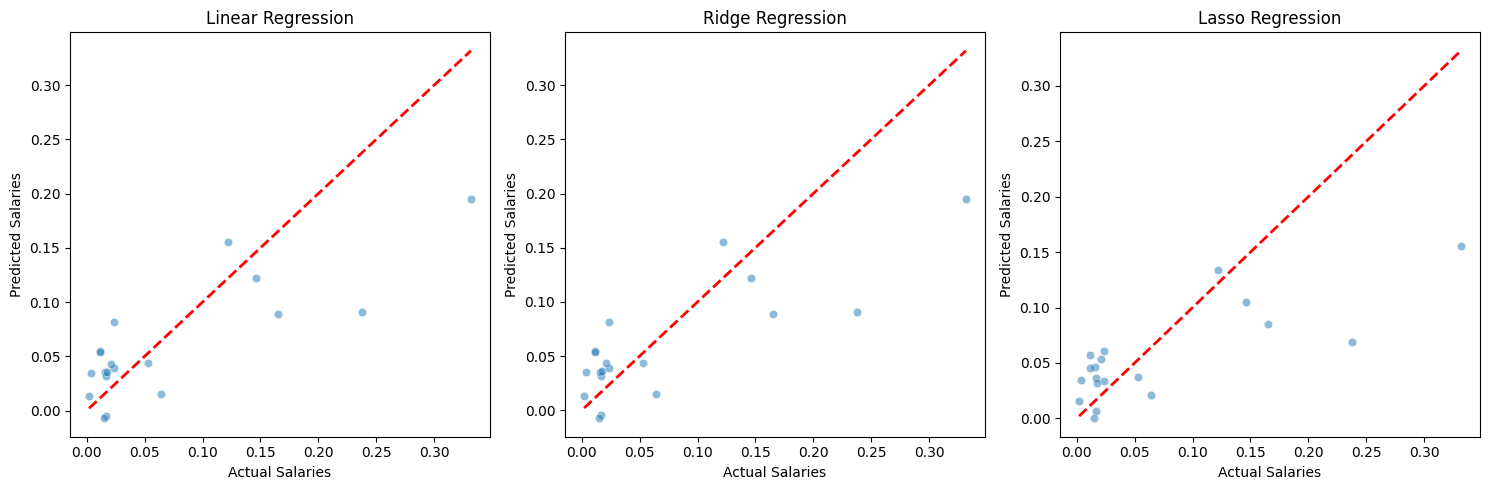

In [82]:

#ridge regression , lasso regression 모두 해보기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/combined_data(2).csv')
data= data.dropna()

# Display the first few rows of the dataset to check the data
print(data.head())

# Select key features
selected_features = ['PTS', 'MP', 'FG%', 'AST', 'TRB', '3P%', 'BLK', 'FG']

# Define X and y
X = data[selected_features]
y = data['target']

# Handle missing values
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions with Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled)

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions with Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Linear Regression - Mean Squared Error: {mse_linear}, R^2 Score: {r2_linear}')
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}')

# Visualize the results
plt.figure(figsize=(15, 5))

# Linear Regression Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Linear Regression')

# Ridge Regression Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Ridge Regression')

# Lasso Regression Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge
ridge_params = {'alpha': np.logspace(-4, 4, 50)}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

# Define the parameter grid for Lasso
lasso_params = {'alpha': np.logspace(-4, 4, 50)}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

# Best parameters
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']
print(f'Best Ridge alpha: {best_ridge_alpha}')
print(f'Best Lasso alpha: {best_lasso_alpha}')

# Train the models with the best parameters
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}')

Best Ridge alpha: 1.2067926406393288
Best Lasso alpha: 0.0001
Ridge Regression - Mean Squared Error: 0.003121251753266053, R^2 Score: 0.48035583332670184
Lasso Regression - Mean Squared Error: 0.0031175620477639915, R^2 Score: 0.48097011698353354


           name debut  start   end     salary  birth    target Pos  \
0   A.J. Lawson  2021   2023  2026  1978006.0   2000  0.013971  SG   
1  Aaron Brooks  2007   2012  2013  3323125.0   1985  0.057252  PG   
2  Aaron Brooks  2007   2012  2013  2454000.0   1985  0.042278  PG   
3  Aaron Brooks  2007   2015  2015  2250000.0   1985  0.032143  PG   
4  Aaron Brooks  2007   2016  2016  2700000.0   1985  0.028680  PG   

            G         GS  ...       FT%       ORB       DRB       TRB  \
0   51.000000   0.000000  ...  0.361347  0.361389  0.970833  1.332222   
1  100.000000  45.538136  ...  0.853411  0.510593  1.497034  1.957627   
2  100.000000  45.538136  ...  0.853411  0.510593  1.497034  1.957627   
3  110.666667  16.031971  ...  0.807001  0.409023  1.395226  1.806451   
4   98.333333   9.805556  ...  0.822928  0.430093  1.373843  1.803935   

        AST       STL       BLK       TOV        PF        PTS  
0  0.214306  0.126806  0.029167  0.224444  0.648750   3.580139  
1  4.61737

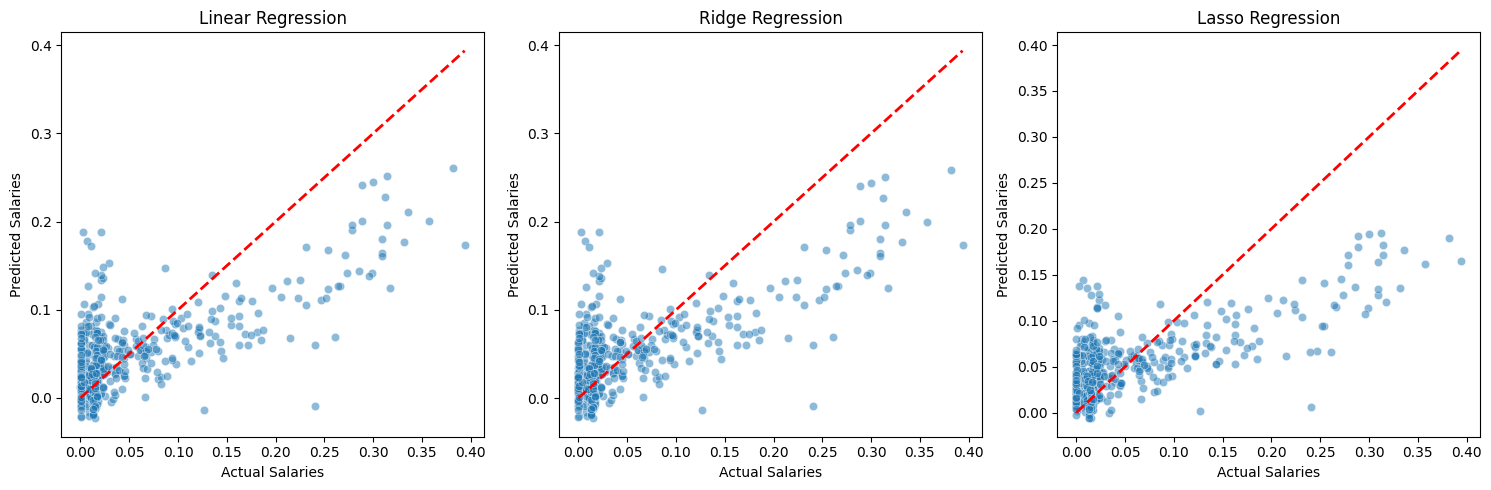

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/final_nba_data.csv')
data = data.dropna()

# Display the first few rows of the dataset to check the data
print(data.head())

# Select key features
selected_features = ['PTS', 'MP', 'FG%', 'AST', 'TRB', '3P%', 'BLK', 'FG']

# Define X and y
X = data[selected_features]
y = data['target']

# Handle missing values
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate adjusted R²
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions with Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled)

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions with Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
adjusted_r2_linear = adjusted_r2_score(r2_linear, len(y_test), X_test.shape[1])

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
adjusted_r2_ridge = adjusted_r2_score(r2_ridge, len(y_test), X_test.shape[1])

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
adjusted_r2_lasso = adjusted_r2_score(r2_lasso, len(y_test), X_test.shape[1])

print(f'Linear Regression - Mean Squared Error: {mse_linear}, R^2 Score: {r2_linear}, Adjusted R^2 Score: {adjusted_r2_linear}')
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}, Adjusted R^2 Score: {adjusted_r2_ridge}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}, Adjusted R^2 Score: {adjusted_r2_lasso}')

# Visualize the results
plt.figure(figsize=(15, 5))

# Linear Regression Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Linear Regression')

# Ridge Regression Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Ridge Regression')

# Lasso Regression Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()


           name  start             Tm Pos   Age    G         GS         MP  \
0  Aaron Brooks   2013  TOT, SAC, HOU  PG  28.0  106  18.679245  18.783019   
1  Aaron Brooks   2014  TOT, HOU, DEN  PG  29.0  144   8.416667  21.627083   
2  Aaron Brooks   2015            CHI  PG  30.0   82  21.000000  23.000000   
3  Aaron Brooks   2016            CHI  PG  31.0   69   0.000000  16.100000   
4  Aaron Brooks   2017            IND  PG  32.0   65   0.000000  13.800000   

         FG        FGA  ...       STL       BLK       TOV        PF  \
0  2.691509   5.989623  ...  0.566981  0.213208  1.297170  1.770755   
1  3.202778   8.086806  ...  0.710417  0.170139  1.621528  2.020833   
2  4.200000  10.000000  ...  0.700000  0.200000  1.900000  2.300000   
3  2.700000   6.800000  ...  0.400000  0.100000  1.200000  1.900000   
4  1.900000   4.600000  ...  0.400000  0.100000  1.000000  1.400000   

         PTS  debut   end     salary  birth    target  
0   7.114151   2007  2013   947907.0   1985  0.0

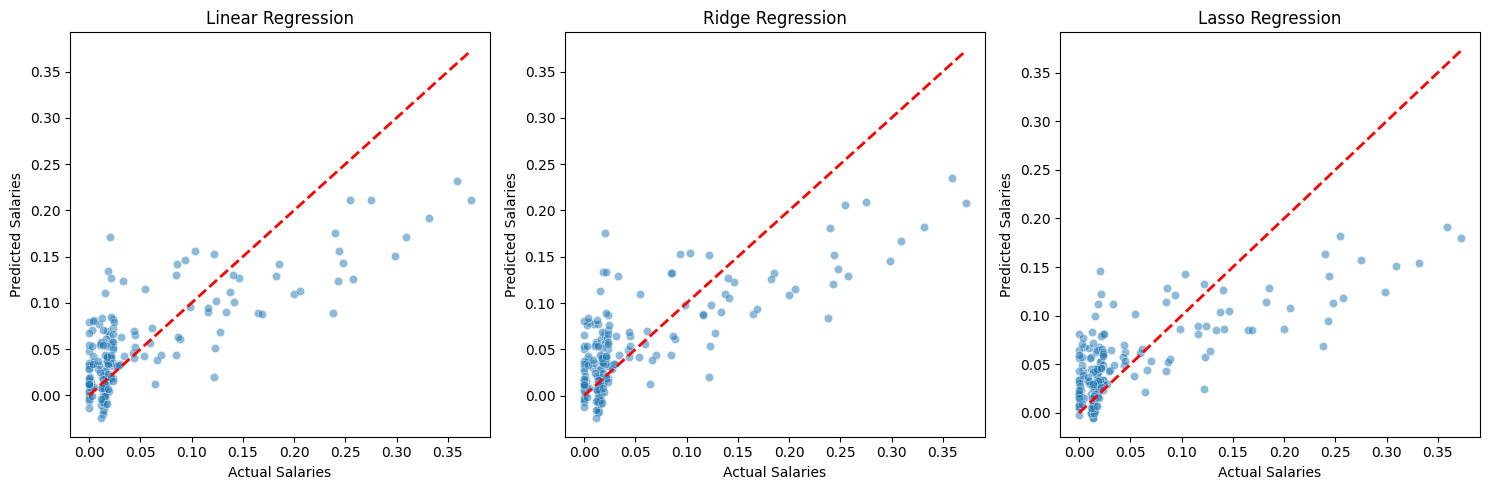

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/2010_2021_combined(2).csv')

# Display the first few rows of the dataset to check the data
print(data.head())

# Select key features
selected_features = ['PTS', 'MP', 'FG%', 'AST', 'TRB', '3P%', 'BLK', 'FG','Age']

# Define X and y
X = data[selected_features]
y = data['target']

# Handle missing values
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate adjusted R²
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions with Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled)

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions with Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
adjusted_r2_linear = adjusted_r2_score(r2_linear, len(y_test), X_test.shape[1])

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
adjusted_r2_ridge = adjusted_r2_score(r2_ridge, len(y_test), X_test.shape[1])

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
adjusted_r2_lasso = adjusted_r2_score(r2_lasso, len(y_test), X_test.shape[1])

print(f'Linear Regression - Mean Squared Error: {mse_linear}, R^2 Score: {r2_linear}, Adjusted R^2 Score: {adjusted_r2_linear}')
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}, Adjusted R^2 Score: {adjusted_r2_ridge}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}, Adjusted R^2 Score: {adjusted_r2_lasso}')

# Visualize the results
plt.figure(figsize=(15, 5))

# Linear Regression Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Linear Regression')

# Ridge Regression Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Ridge Regression')

# Lasso Regression Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()
